<a href="https://colab.research.google.com/github/minthammock-development/Technical-Assignments/blob/main/RingCentral_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Custom Functions
def breakColumns(df, columns, conditionRevenue = []):
  for column in columns:
    entries = df[column].value_counts().index
    for entry in entries:
      df[entry] = [1 if x == entry else 0 for x in df[column]]
      if column in conditionRevenue:
        df[f'{entry} Revenue'] = [df['Forecasted Annual Revenue'][i] if (df[column][i] == entry and df['Stage'][i] == '7. Closed Won') else 0 for i in range(len(df))]
    df.drop(columns=[column], inplace=True)

In [ ]:
dfPartners = pd.read_excel('/content/drive/MyDrive/Reporting Working Example-S&D Details-Partner Operations Analyst.xlsx',sheet_name='Partners')
dfOpp = pd.read_excel('/content/drive/MyDrive/Reporting Working Example-S&D Details-Partner Operations Analyst.xlsx', sheet_name='Opportunities')

In [ ]:
display(dfPartners.loc[dfPartners['Partner ID'].duplicated() == True])
dfPartners = dfPartners.drop(dfPartners.loc[dfPartners['Partner ID'].duplicated() == True].index)

,Partner Name,Partner ID,Channel Manager
186,Partner 536,44764,Channel Manager 6
271,Partner 543,56304,Channel Manager 6
298,Partner 490,58007,Channel Manager 4
308,Partner 599,59128,Channel Manager 7
454,Partner 556,74611,Channel Manager 6
456,Partner 533,75119,Channel Manager 5
457,Partner 557,75119,Channel Manager 6
493,Partner 617,79257,Channel Manager 7
498,Partner 618,79265,Channel Manager 7
514,Partner 566,79349,Channel Manager 6


In [ ]:
# display(dfPartners.head())
# dfPartners.info()
# dfPartners['Partner ID'].value_counts()


In [ ]:
# display(dfOpp.head())
# dfOpp.info()

In [ ]:
df = pd.merge(dfPartners, dfOpp, on='Partner ID')
df['Opportunity'] = [1 for x in df['Opportunity Name']]
df['Closed Revenue'] = [df['Forecasted Annual Revenue'][i] if df['Stage'][i] == '7. Closed Won' else 0 for i in range(len(df))]
columnsToBreak = ['Channel Manager', 'Stage']
breakColumns(df, columnsToBreak, conditionRevenue=columnsToBreak[0])

df.head()

,Partner Name,Partner ID,Opportunity Name,Forecasted Office Users,Forecasted Annual Revenue,CreateDateTime,Forecasted Close Date,Opportunity,Closed Revenue,Channel Manager 4,Channel Manager 4 Revenue,Channel Manager 6,Channel Manager 6 Revenue,Channel Manager 3,Channel Manager 3 Revenue,Channel Manager 1,Channel Manager 1 Revenue,Channel Manager 7,Channel Manager 7 Revenue,Channel Manager 5,Channel Manager 5 Revenue,Channel Manager 2,Channel Manager 2 Revenue,0. Downgraded,7. Closed Won,1. Qualify,2. Problem,3. Solution,4. Proof,5. Agreement,6. Order
0,Partner 592,478,Opportunity 2817,250.0,33592.92,2020-11-13 04:00:00,2020-12-31,1,33592.92,0,0.0,0,0.0,0,0.00,0,0.0,1,33592.92,0,0.0,0,0.0,0,1,0,0,0,0,0,0
1,Partner 177,3257,Opportunity 3291,1.0,2312.40,2020-01-28 12:15:00,2020-02-29,1,0.00,0,0.0,0,0.0,1,0.00,0,0.0,0,0.00,0,0.0,0,0.0,1,0,0,0,0,0,0,0
2,Partner 178,3273,Opportunity 3376,1.0,446.91,2020-07-08 14:29:00,2020-08-19,1,0.00,0,0.0,0,0.0,1,0.00,0,0.0,0,0.00,0,0.0,0,0.0,1,0,0,0,0,0,0,0
3,Partner 179,4155,Opportunity 3330,4.0,1180.46,2020-03-18 08:50:00,2020-07-17,1,0.00,0,0.0,0,0.0,1,0.00,0,0.0,0,0.00,0,0.0,0,0.0,1,0,0,0,0,0,0,0
4,Partner 192,8998,Opportunity 1601,3.0,1187.64,2020-05-21 09:57:00,2020-05-22,1,1187.64,0,0.0,0,0.0,1,1187.64,0,0.0,0,0.00,0,0.0,0,0.0,0,1,0,0,0,0,0,0


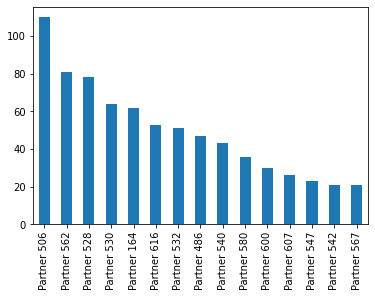

In [ ]:
df['Partner Name'].value_counts()[:15].plot(kind = 'bar')

In [ ]:
df.set_index('CreateDateTime', inplace=True)
df.sort_values('CreateDateTime', axis = 0, inplace=True)

In [ ]:
dfMonth = df.resample('MS').sum()
dfMonth['Total Churn'] = 1 - round(dfMonth['7. Closed Won']/dfMonth['Opportunity'],2)
display((dfMonth.head()))
dfQuarter = df.resample('Q').sum()
dfQuarter['Total Churn'] = 1 - round(dfQuarter['7. Closed Won']/dfQuarter['Opportunity'],2)


,Partner ID,Forecasted Office Users,Forecasted Annual Revenue,Opportunity,Closed Revenue,Channel Manager 4,Channel Manager 4 Revenue,Channel Manager 6,Channel Manager 6 Revenue,Channel Manager 3,Channel Manager 3 Revenue,Channel Manager 1,Channel Manager 1 Revenue,Channel Manager 7,Channel Manager 7 Revenue,Channel Manager 5,Channel Manager 5 Revenue,Channel Manager 2,Channel Manager 2 Revenue,0. Downgraded,7. Closed Won,1. Qualify,2. Problem,3. Solution,4. Proof,5. Agreement,6. Order,Total Churn
CreateDateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,5275597,50211.0,7830957.38,94,27675.43,12,3095.28,3,0.00,33,13568.50,19,6130.85,10,0.00,17,4880.80,0,0.00,72,19,1,2,0,0,0,0,0.80
2020-02-01,5910729,28899.0,5705890.49,105,68431.92,26,19737.73,9,0.00,21,8089.42,23,18951.64,3,0.00,18,0.00,5,21653.13,84,14,3,3,1,0,0,0,0.87
2020-03-01,8194289,29004.0,6316572.51,134,266541.29,27,57790.41,13,4729.58,31,32130.46,28,53122.87,9,81539.78,20,30099.04,6,7129.15,84,41,6,0,3,0,0,0,0.69
2020-04-01,5622912,19368.0,3003746.36,90,94495.67,25,45690.38,11,0.00,26,17991.63,11,1963.95,8,24576.62,7,3518.89,2,754.20,58,21,5,4,1,0,1,0,0.77
2020-05-01,6156547,23696.0,5817174.95,101,504838.11,16,68130.37,13,2765.16,19,30800.00,29,48663.94,13,53643.04,8,222669.56,3,78166.04,56,37,3,5,0,0,0,0,0.63


In [ ]:
round(dfMonth['7. Closed Won']/dfMonth['Opportunity'],2)*100

CreateDateTime
2020-01-01    20.0
2020-02-01    13.0
2020-03-01    31.0
2020-04-01    23.0
2020-05-01    37.0
2020-06-01    29.0
2020-07-01    25.0
2020-08-01    32.0
2020-09-01    32.0
2020-10-01    23.0
2020-11-01    15.0
2020-12-01    20.0
2021-01-01    23.0
2021-02-01    15.0
2021-03-01    16.0
2021-04-01     6.0
Freq: MS, dtype: float64

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

px.line(data_frame=dfQuarter, x = dfQuarter.index, y ='Closed Revenue',)
px.line(data_frame=dfMonth, x = dfMonth.index, y = 'Closed Revenue')
px.bar(data_frame = dfMonth, x = dfMonth.index, y = dfMonth['Channel Manager 6'], barmode='stack')
px.line(data_frame=dfMonth, x = dfMonth.index, y ='Forecasted Annual Revenue', color = 'Channel Manager 1')

fig = go.Figure(
  data = [
    go.Bar(
      name = label, 
      x = dfMonth.index, 
      y = dfMonth[label],
      text = dfMonth[label],
      textposition = 'inside',
      textangle = 0,

    ) for label in sorted(dfPartners['Channel Manager'].unique())
  ],

  layout = {
      'title': 'Opportunities per Month by Channel Manager',
      'xaxis' : {
          'title' : 'Reporting Month',
          'tickangle' : -90,
          'nticks' : 16
      },
      'yaxis' : {
          'title' : 'Opportunity Count',
      }
  }
)
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

fig3 = go.Figure(data=[
  go.Bar(
      name = label, 
      x = dfQuarter.index, 
      y = dfQuarter[label],
      text = dfQuarter[label],
      textposition = 'inside',
      textangle = 0,
    ) for label in sorted(dfPartners['Channel Manager'].unique())] + \
  [
  go.Scatter(
    name = 'Total Opportunities',
    x = dfQuarter.index, 
    y = dfQuarter['Opportunity'], 
    text = dfQuarter['Opportunity'],
    mode="lines+text+markers",
    # textangle = 0,
    textposition = 'top left',
    line = {'color' : 'black'}
  )
  ],
     layout = {
      'title': 'Opportunities per Quarter by Channel Manager',
      'xaxis' : {
          'title' : 'Reporting Quarter',
          'tickangle': -90,
          # 'tickmode' : 'array',
          # 'tickvals' : ['05/01/2020','08/01/2020','11/01/2020','02/01/2021','05/01/2021','08/01/2020'],
          # 'ticktext' : ['Q2','Q3', 'Q4', 'Q1', 'Q2', 'Q3' ],
          'nticks' : 6,
          # 'ticklabelposition': 'outside left',
          
      },
      'yaxis' : {
          'title' : 'Opportunity Count',
      }
  }
)

# Change the bar mode
fig3.update_layout(barmode='stack')
fig3.show()

In [ ]:
fig2 = go.Figure(data=[
    go.Scatter(x = dfQuarter.index, y = dfQuarter['Closed Revenue']),
    # go.Bar(x = dfQuarter.index, y = dfQuarter['Channel Manager 7']),
    go.Bar(x = dfQuarter.index, y = dfQuarter.diff(1)['Closed Revenue']),
])
fig2.show()
fig4 = go.Figure(data=[
    go.Scatter(x = dfQuarter.index, y = dfQuarter['Total Churn']),
    # go.Bar(x = dfQuarter.index, y = dfQuarter['Channel Manager 7']),
    go.Bar(x = dfQuarter.index, y = dfQuarter.diff(1)['Total Churn']),
])
fig4.show()
fig5 = go.Figure(
  data = [
    go.Scatter(
      name = label, 
      x = dfQuarter.index, 
      y = dfQuarter[f'{label} Revenue'],
      text = round(dfQuarter[f'{label} Revenue'],0),
    ) for label in sorted(dfPartners['Channel Manager'].unique())
  ] + \
  [go.Bar(name = label, x = dfQuarter.index, y = dfQuarter.diff(1)[f'{label} Revenue']) for label in sorted(dfPartners['Channel Manager'].unique())],

  layout = {
      'title': 'Opportunities per Month by Channel Manager',
      'xaxis' : {
          'title' : 'Reporting Month',
          'tickangle' : -90,
          'nticks' : 16
      },
      'yaxis' : {
          'title' : 'Opportunity Count',
      }
  }
)
fig5.show()